In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
data = pd.read_csv("./dataset/train.csv")
data = np.array(data)

np.random.shuffle(data)

In [142]:
data

array([[4, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [143]:
rows, cols = data.shape
data_dev = data[:2000].T
x_dev = data_dev[1:cols] / 255.0
y_dev = data_dev[0]

data_train = data[2000:].T
x_train = data_train[1:cols] / 255.0
y_train = data_train[0]

In [144]:
def init_param():
    w1 = np.random.randn(10, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((10, 1))
    w2 = np.random.randn(10, 10) * np.sqrt(2. / 10)
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

In [145]:
def Relu(x):
    return np.maximum(0, x)

def Softmax(x):
    exps = np.exp(x - np.max(x, axis=0, keepdims=True))
    return exps / np.sum(exps, axis=0, keepdims=True)

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = Relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = Softmax(z2)
    return z1, a1, z2, a2

In [146]:

def one_hot(y):
    one_hot_y = np.zeros((y.size, int(y.max()) + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def Relu_der(x):
    return x > 0

def backward_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size
    hot_y = one_hot(y)
    dz2 = a2 - hot_y
    dw2 = (1/m) * dz2.dot(a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * Relu_der(z1)
    dw1 = (1/m) * dz1.dot(x.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2

In [147]:
def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2

In [148]:
def get_pred(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(pred, y):
    return np.mean(pred == y)

def gradient_descent(x, y, alpha, iterations):
    w1, b1, w2, b2 = init_param()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        if i % 10 == 0:
            predictions = get_pred(a2)
            accuracy = get_accuracy(predictions, y)
            print(f"Iteration {i}, Accuracy: {accuracy * 100:.2f}%")
    return w1, b1, w2, b2

In [149]:

w1, b1, w2, b2 = gradient_descent(x_train, y_train, 0.1, 2000)

Iteration 0, Accuracy: 11.03%
Iteration 10, Accuracy: 34.41%
Iteration 20, Accuracy: 50.56%
Iteration 30, Accuracy: 63.04%
Iteration 40, Accuracy: 68.84%
Iteration 50, Accuracy: 72.08%
Iteration 60, Accuracy: 76.77%
Iteration 70, Accuracy: 81.22%
Iteration 80, Accuracy: 83.18%
Iteration 90, Accuracy: 84.28%
Iteration 100, Accuracy: 85.15%
Iteration 110, Accuracy: 85.86%
Iteration 120, Accuracy: 86.41%
Iteration 130, Accuracy: 86.84%
Iteration 140, Accuracy: 87.23%
Iteration 150, Accuracy: 87.59%
Iteration 160, Accuracy: 87.89%
Iteration 170, Accuracy: 88.16%
Iteration 180, Accuracy: 88.39%
Iteration 190, Accuracy: 88.61%
Iteration 200, Accuracy: 88.81%
Iteration 210, Accuracy: 88.98%
Iteration 220, Accuracy: 89.13%
Iteration 230, Accuracy: 89.28%
Iteration 240, Accuracy: 89.42%
Iteration 250, Accuracy: 89.54%
Iteration 260, Accuracy: 89.67%
Iteration 270, Accuracy: 89.77%
Iteration 280, Accuracy: 89.90%
Iteration 290, Accuracy: 89.96%
Iteration 300, Accuracy: 90.06%
Iteration 310, Accu

In [154]:
def make_predictions(x,w1,b1,w2,b2):
    _,_,_,a2 = forward_prop(w1,b1,w2,b2,x)
    return get_pred(a2)

def test_pred(index,w1,b1,w2,b2):
    current_img = x_train[:,index,None]
    output = make_predictions(x_train[:,index,None],w1,b1,w2,b2)
    label = y_train[index]
    print("Predication :" ,output)
    print("labelk : ", label)
    
    
    current_img = current_img.reshape(28,28) * 255
    plt.gray()
    plt.imshow(current_img,interpolation = "nearest")
    plt.show()

Predication : [3]
labelk :  3


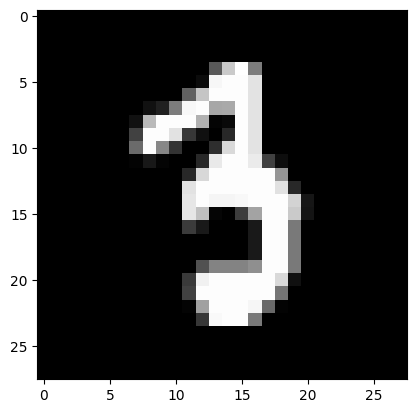

In [159]:
test_pred(10909,w1,b1,w2,b2)


In [162]:
dev_pred = make_predictions(x_dev,w1,b1,w2,b2)
dev_acc = get_accuracy(dev_pred, y_dev)


In [163]:
print(dev_acc)

0.9175
